In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from rtbm import RTBM, minimizer, model, layers, gradientschemes, stopping
from rtbm.costfunctions import logarithmic

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import cauchy,levy,norm,beta,gamma

from rtbm.layers import ThetaUnitLayer, NormAddLayer
from rtbm.model import Model

# Example 1

## Generate data

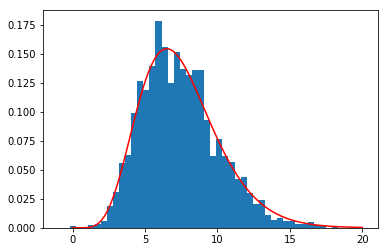

In [39]:
# simple gaussian
n = 2000
data = gamma.rvs(7.5, scale=1,size=n).reshape(1,n)
data = np.select([np.abs(data) < 20], data)

data = data.reshape(1,data.shape[1])

plt.hist(data.T, bins=50,range=(-1,20), normed=True);

x = np.linspace(0,20, 100)
plt.plot(x, gamma.pdf(x,7.5, scale=1),"r-")


## Training with CMA

In [63]:
M = RTBM(1,2, init_max_param_bound=50, random_bound=1)

In [64]:
minim = minimizer.CMA(False)
solution = minim.train(logarithmic, M, data, tolfun=1e-5)

CMA on 1 cpu(s) enabled
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 9 (seed=495410, Sun Dec  3 14:15:45 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 7.907360281937022e+04 1.0e+00 4.75e+00  5e+00  5e+00 0:00.0
    2     20 2.547058879897887e+04 1.1e+00 5.55e+00  5e+00  6e+00 0:00.5
    3     30 9.591964127105926e+03 1.2e+00 6.06e+00  6e+00  7e+00 0:00.8
   13    130 6.830145701040904e+04 1.9e+00 6.87e+00  5e+00  7e+00 0:04.1
   28    280 1.470511192866405e+04 3.5e+00 3.22e+00  1e+00  4e+00 0:08.4
   48    480 7.023361699261859e+03 5.1e+00 1.24e+00  5e-01  1e+00 0:13.5
   72    720 5.654715670880519e+03 1.1e+01 4.24e-01  1e-01  4e-01 0:19.7
  100   1000 5.319329784697164e+03 3.3e+01 1.38e-01  3e-02  1e-01 0:26.9
  131   1310 4.895536058859407e+03 1.7e+02 4.04e-01  8e-02  7e-01 0:34.9
  166   1660 4.732219323277493e+03 3.0e+02 3.22e-01  4e-02  5e-01 0:44.0
  200   2000 4.718438523127206e+03 3.9e+02 5.23e-02  4e-03  7e-02 0:52.8
  243   24

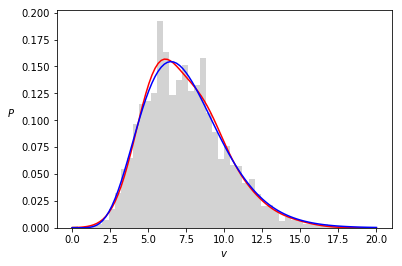

In [66]:
test_data = (np.linspace(0,20, 100)).reshape(1, 100)
plt.hist(data.T, bins=50,range=(0,20), normed=True, color="lightgray")
plt.plot(test_data.flatten(), M(test_data).flatten(), 'r-')
x = np.linspace(0,20, 100)
plt.xlabel("$v$")
plt.ylabel("$P$", rotation=0, labelpad=10)


plt.plot(x, gamma.pdf(x,7.5, scale=1),"b-")

plt.savefig("GammaDist.eps", format="eps")